In [1]:
import numpy as np
from scipy import random
import networkx as nx
import pandas as pd
import random
import collections
import matplotlib.pyplot as plt
import matplotlib as mplt
import os
import json
from time import time
%matplotlib inline

from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D   
from matplotlib import gridspec
import matplotlib.font_manager as fm

plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1.2
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1.2
plt.rcParams['axes.linewidth'] = 1.2

# set the font family style
mplt.rcParams['font.family'] = 'Avenir'
mplt.rcParams['pdf.fonttype'] = 42

ModuleNotFoundError: No module named 'palettable'

In [2]:
def stretch_list(some_list, target_len):
    some_list = list(some_list)
    #Stretching a list adding the last element at the end until it reaches the desired length
    return some_list[:target_len] + [some_list[-1]]*(target_len - len(some_list))

FileNotFoundError: [Errno 2] No such file or directory: '../Results/Simulations/HONG_2words_Sociopatterns/InVS15/intersection/fixed_p0.03_varbeta_run0/HONG_densities_beta0.4138_p0.03.csv'

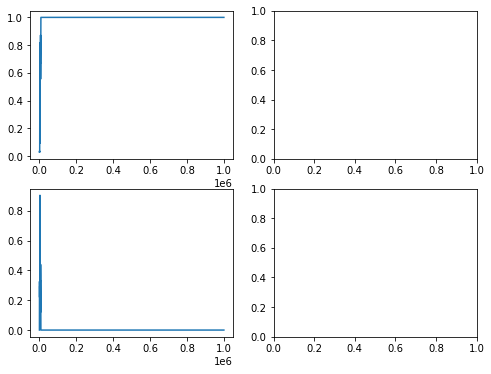

In [5]:
p=0.03
n_runs = 50
datasetlist = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','congress-bills']
dataset_strings = ['InVS15','LyonSchool','SFHH','Thiers13','Email-EU','Congress-bills']
#colors = [ListedColormap(pltt.colorbrewer.qualitative.Paired_7.mpl_colors)(i) for i in range(0,7)]
#sorted_colors = [colors[i] for i in [0, 1, 4, 5, 2, 6]]

time = np.arange(0, 1e6+500, 500)

######################################################################
rule = 'intersection'
######################################################################

fig, ax = plt.subplots(2,2, figsize=(8,6))

beta = 0.2759

#Here I'll store the plots for the legend
pxs = []

for ii, dataset in enumerate(datasetlist[1:2]):
    
    tensor_A, tensor_AB = [], []       
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = 'outputs/HONG_densities_beta0.2758_p0.03.csv'
        else:
            fname = 'outputs/HONG_densities_beta0.2758_p0.03.csv'
        df = pd.read_csv(fname)

        #adding values after absorbing state
        if len(df)<2001:
            tensor_A.append(stretch_list(df['n_A+p'].values, 2001))
            tensor_AB.append(stretch_list(df['n_AB'].values, 2001))
        else:
            tensor_A.append(df['n_A+p'].values)
            tensor_AB.append(df['n_AB'].values)

    tensor_A = np.array(tensor_A)
    tensor_AB = np.array(tensor_AB)
    med_tensor_A = np.median(tensor_A, axis=0)
    med_tensor_AB = np.median(tensor_AB, axis=0)
    std_tensor_A = np.std(tensor_A, axis=0)
    std_tensor_AB = np.std(tensor_AB, axis=0)
    
    px = ax[0][0].plot(time, med_tensor_A)
    pxs.append(px[0])
    ax[0][0].fill_between(time, med_tensor_A-std_tensor_A, med_tensor_A+std_tensor_A, alpha=0.1, zorder=0)
    ax[1][0].plot(time, med_tensor_AB)
    ax[1][0].fill_between(time, med_tensor_AB-std_tensor_AB, med_tensor_AB+std_tensor_AB, alpha=0.1, zorder=0)

##############################################################################
    
beta = 0.4138

for ii, dataset in enumerate(datasetlist):
    
    tensor_A, tensor_AB = [], []
    for run_id in range(n_runs):
        if dataset in ['Email-EU','congress-bills']:
            fname = '../Results/Simulations/HONG_2words_%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        else:
            fname = '../Results/Simulations/HONG_2words_Sociopatterns/%s/%s/fixed_p%.2f_varbeta_run%i/HONG_densities_beta%.4f_p%.2f.csv'%(dataset, rule, p, run_id, beta, p)
        df = pd.read_csv(fname)
        
        #adding values after absorbing state
        if len(df)<2000:
            tensor_A.append(stretch_list(df['n_A+p'].values, 2001))
            tensor_AB.append(stretch_list(df['n_AB'].values, 2001))
        else:
            tensor_A.append(df['n_A+p'].values)
            tensor_AB.append(df['n_AB'].values)
        
    tensor_A = np.array(tensor_A)
    tensor_AB = np.array(tensor_AB)
    med_tensor_A = np.median(tensor_A, axis=0)
    med_tensor_AB = np.median(tensor_AB, axis=0)
    std_tensor_A = np.std(tensor_A, axis=0)
    std_tensor_AB = np.std(tensor_AB, axis=0)
        
    ax[0][1].plot(time, med_tensor_A)
    ax[0][1].fill_between(time, med_tensor_A-std_tensor_A, med_tensor_A+std_tensor_A, alpha=0.1, zorder=0)
    ax[1][1].plot(time, med_tensor_AB)
    ax[1][1].fill_between(time, med_tensor_AB-std_tensor_AB, med_tensor_AB+std_tensor_AB, alpha=0.1, zorder=0)

##############################################################################    
  
ax[1][0].set_xlabel(r'Time, $t$', size=18)
ax[1][1].set_xlabel(r'Time, $t$', size=18)
ax[0][0].set_ylabel(r'$n_{A+A_c}(t)$', size=18)  
ax[1][0].set_ylabel(r'$n_{AB}(t)$', size=18)      
  
axlabels=[['A','B'],['C','D']]
for ii in [0,1]:
    for jj in [0,1]:
        ax[ii][jj].set_xscale('log')
        ax[ii][jj].set_xlim(1e2, 1e6)
        ax[ii][jj].set_yticks([0,0.2,0.4,0.6,0.8,1])
        ax[ii][jj].set_ylim(-0.01, +1.01)
        ax[ii][jj].tick_params(axis='both', which='major', labelsize=18)
        ax[ii][jj].annotate(axlabels[ii][jj], xy=(0.05, 0.12), xycoords="axes fraction", fontsize=20, fontweight="bold")

ax[0][0].set_title(r'$\beta=%.2f$'%0.2759, size=15)
ax[0][1].set_title(r'$\beta=%.2f$'%0.4138, size=15)
    
      
#################################### Adjusting ticks #################################### 
ax[0][0].set_xticklabels([])        
ax[0][1].set_xticklabels([])   
ax[0][1].set_yticklabels([]) 
ax[1][1].set_yticklabels([]) 

ax[0][0].set_xticks([1e2,1e3,1e4,1e5,1e6])
ax[0][1].set_xticks([1e2,1e3,1e4,1e5,1e6])
ax[1][0].set_xticks([1e2,1e3,1e4,1e5,1e6])
ax[1][1].set_xticks([1e2,1e3,1e4,1e5,1e6])

for ii in [0,1]:
    for jj in [0,1]:
        ax[ii,jj].spines['right'].set_color('none')
        ax[ii,jj].spines['top'].set_color('none')
        ax[ii,jj].xaxis.set_ticks_position('bottom')

        ax[ii,jj].spines['bottom'].set_position(('axes', -0.05))
        ax[ii,jj].yaxis.set_ticks_position('left')
        ax[ii,jj].spines['left'].set_position(('axes', -0.05))
            

#################################### LEGEND ####################################

#Creating fillings for legend entries
#pxsf = [ax[0][0].fill(np.NaN, np.NaN, 'gray', alpha=0.2)[0] for ii in range(6)]

# #ax[0][0].legend([(pxsf[ii], pxs[ii]) for ii in range(6)],
#           [dataset_strings[ii] for ii in range(6)],
#           fontsize=14, ncol=2, handlelength=1, frameon=False,
#           loc='upper center', labelspacing=0.2, borderpad=0, columnspacing=0.5, handletextpad=0.2)

plt.tight_layout()

filename = "../Figures/NG_nx_vs_time_p003_sim_empdata_4panels.pdf"
plt.savefig(filename, bbox_inches='tight', dpi=150)